In [1]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as pyplot
 
import sys
sys.path.insert(0, "../")
from weavingspace import WeaveUnit
from weavingspace import TileUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
dem = gpd.read_file("data/dem-4vars.gpkg")
dem.columns

Index(['elevation', 'shade', 'slope', 'aspect', 'geometry'], dtype='object')

<Axes: >

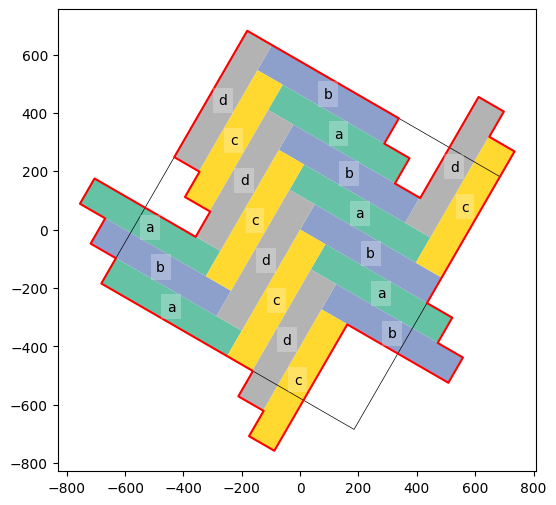

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 5, spacing = 100, aspect = 1.,
               strands = "ab|cd", crs = dem.crs).transform_rotate(60)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6))

In [4]:
weave = Tiling(w1, dem)

In [5]:
textile = weave.get_tiled_map(join_on_prototiles = False, ragged_edges = True)

In [6]:
textile.ids_to_map = list("abcd")
textile.vars_to_map = ["elevation", "slope", "aspect", "shade"]
textile.colors_to_use = ["BrBG_r", "Reds", "Spectral", "Greys"]

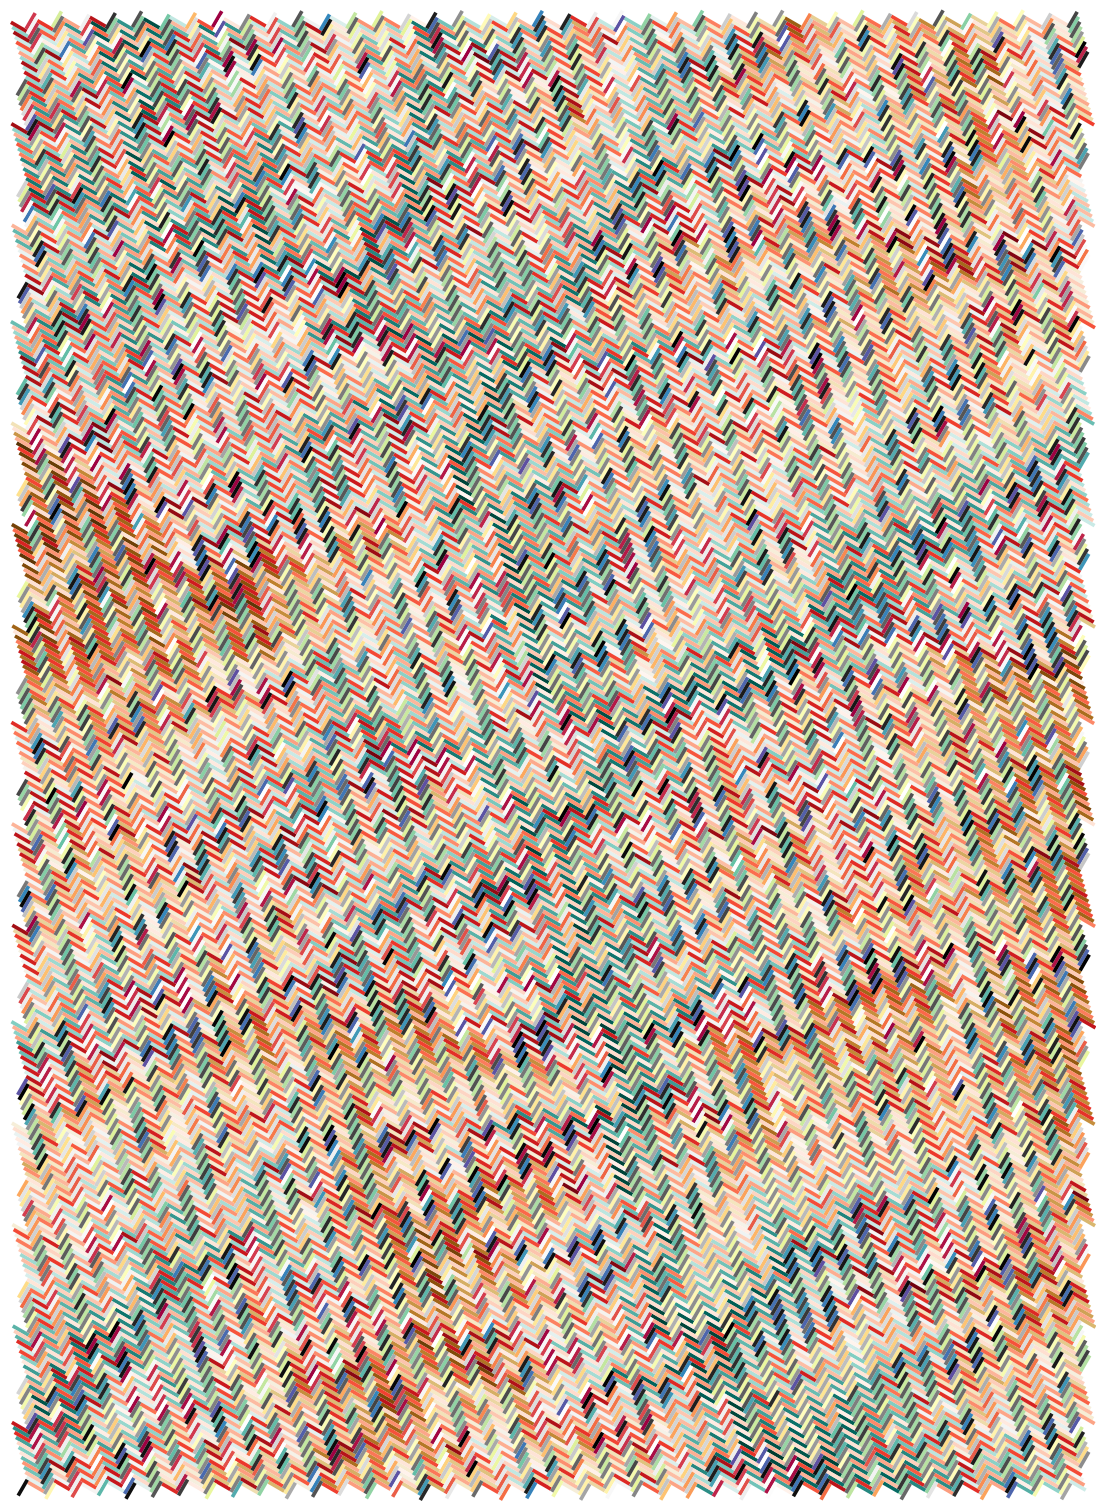

In [7]:
fig = textile.render(legend = False, linewidth = 0)

<Axes: >

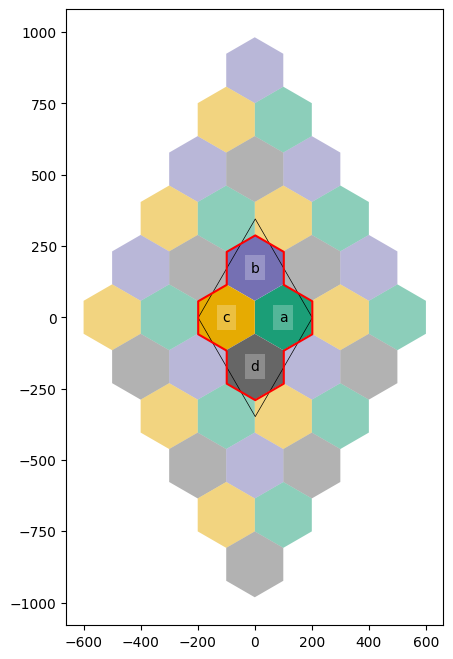

In [8]:
tile_unit = TileUnit(tiling_type = "hex-colouring", n = 4, code = "4.8.8",
                     spacing = 400, crs = dem.crs)#.transform_rotate(-45)
tile_unit.plot(r = 1)

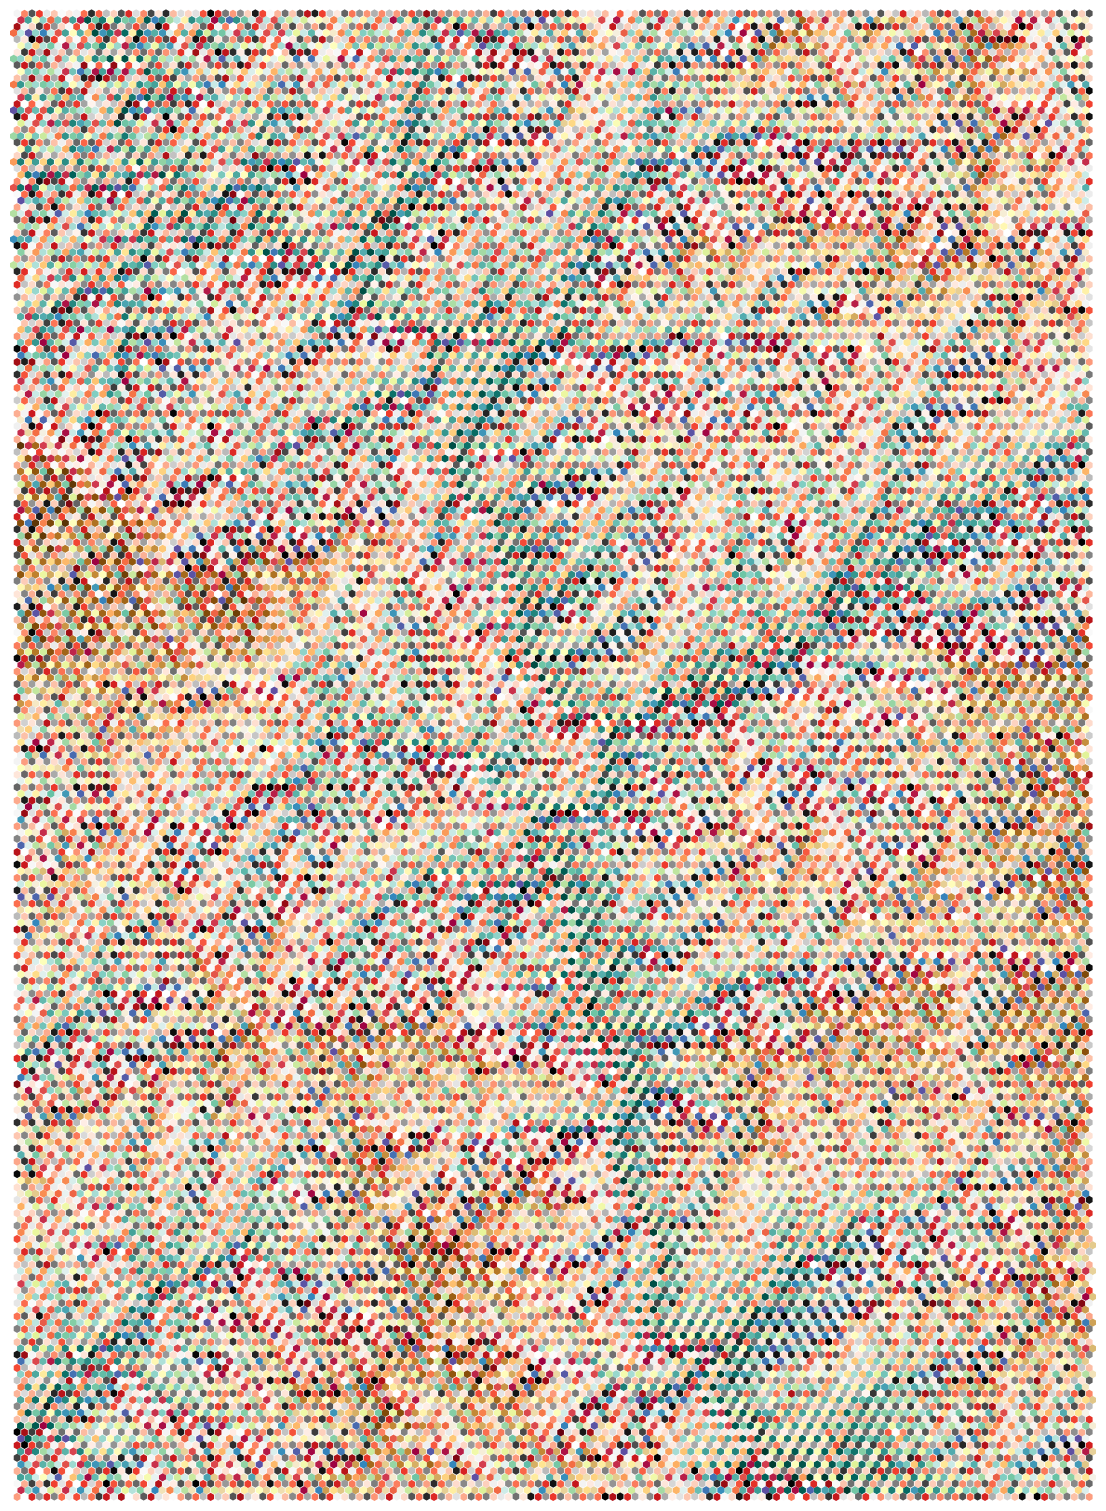

In [11]:
tiling = Tiling(tile_unit, dem, prototile_margin = 10)
t = tiling.get_tiled_map(join_on_prototiles = False)
t.ids_to_map = list("abcd")
t.vars_to_map = ["elevation", "slope", "aspect", "shade"]
t.colors_to_use = ["BrBG_r", "Reds", "Spectral", "Greys"]
fig = t.render(legend = False)